In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import folium
import seaborn as sns

In [2]:
df_init=pd.read_csv('initial.csv')
df_init.drop(columns=['Unnamed: 0'],inplace=True)
df_init['DATE']=pd.to_datetime(df_init['DATE'])
df_init.head()

,CAMIS,DATE,SCORE,INSPECTION TYPE,02A,02B,02C,02D,02E,02F,...,10D,10E,10F,10G,10H,10I,10J,ACTION,CRITICAL FLAG,GRADE
0,30075445,2017-05-18,7.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,1,A
1,30075445,2018-05-11,5.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,0,A
2,30075445,2019-05-16,14.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,1,B
3,30112340,2016-10-03,48.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,3,C
4,30112340,2017-06-26,7.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,1,A


In [3]:
ins_count=[]
CAMIS=df_init['CAMIS'].unique()
for cam in CAMIS:
    ins_count.append(len(df_init.loc[df_init['CAMIS']==cam]))

Text(0.5, 1.0, 'Rate of Cycle/Initial Inspections per restaurant')

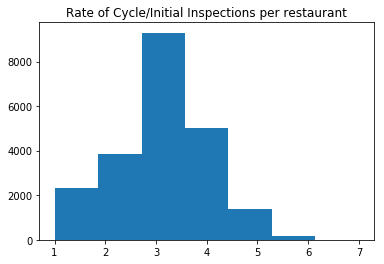

In [4]:
plt.hist(ins_count,bins=7,)
plt.title('Rate of Cycle/Initial Inspections per restaurant')

In [5]:
pd.Series(ins_count).value_counts()

3    9292
4    5008
2    3856
1    2317
5    1396
6     168
7       1
dtype: int64

In order to investigate correlation between an inspection score and the previous inspection perofrmed at the same restaurant we may only consider resstaurants that have had more than 1 inspection.

In [6]:
df_init_sum=pd.DataFrame()
df_init_sum['CAMIS']=CAMIS
df_init_sum['ins_count']=ins_count
twice_ins=df_init_sum.loc[df_init_sum['ins_count']>=2]['CAMIS'].values
df_twice_init=df_init.loc[df_init['CAMIS'].isin(twice_ins)]

In [7]:
prev=[]
for cam,date in zip(df_twice_init['CAMIS'],df_twice_init['DATE']):
    if len(df_init.loc[(df_init['CAMIS']==cam)&(df_init['DATE']<date)]['SCORE'])>0:
        prev.append(df_init.loc[(df_init['CAMIS']==cam)&(df_init['DATE']<date)]['SCORE'].iloc[-1])
    else:
        prev.append(np.nan)
df_twice_init['prev_score']=prev   

KeyboardInterrupt: 

In [8]:
df_twice_init=pd.read_csv('twice_init.csv')

In [9]:
df_twice_init[['SCORE','prev_score']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43894 entries, 0 to 43893
Data columns (total 2 columns):
SCORE         43894 non-null float64
prev_score    43894 non-null float64
dtypes: float64(2)
memory usage: 685.9 KB


In [10]:
df_twice_init.head()

,Unnamed: 0,CAMIS,DATE,SCORE,INSPECTION TYPE,02A,02B,02C,02D,02E,...,10F,10G,10H,10I,10J,ACTION,CRITICAL FLAG,GRADE,prev_score,prev_critical
0,1,30075445,2018-05-11,5.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,0,A,7.0,1
1,2,30075445,2019-05-16,14.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,1,B,5.0,0
2,4,30112340,2017-06-26,7.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,1,A,48.0,3
3,5,30112340,2018-03-13,12.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,1,A,7.0,1
4,6,30112340,2019-03-04,13.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,1,A,12.0,1


In [11]:
df_twice_init.dropna(inplace=True)
# nan values are hte first inspection for that restaurant i nthe dataset, there is no previous inspection to compare against

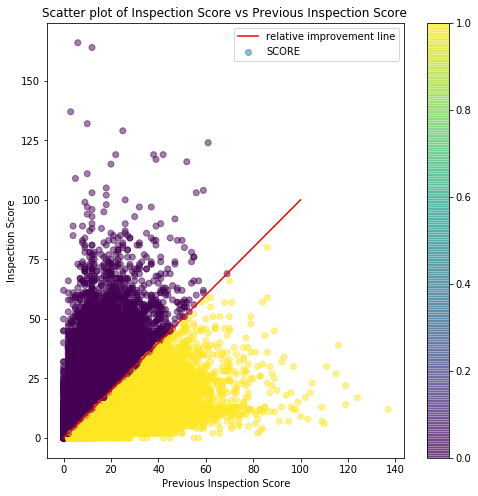

In [12]:
plt.figure(figsize=(8,8))
plt.scatter(df_twice_init['prev_score'],df_twice_init['SCORE'],alpha=0.5,c=df_twice_init['prev_score']-df_twice_init['SCORE']>0)
plt.title('Scatter plot of Inspection Score vs Previous Inspection Score ')
plt.plot([0,20,100],[0,20,100],color='red',label='relative improvement line')
plt.xlabel('Previous Inspection Score')
plt.ylabel('Inspection Score')
plt.colorbar()
plt.legend()
plt.show()

In [13]:
df_twice_init[['SCORE','prev_score']].corr()

,SCORE,prev_score
SCORE,1.000000,0.232972
prev_score,0.232972,1.000000


Surprisingly the score received by a restaurant upon inspoection is only weakly correlated to its previous inspection. Restaurants are absolutely capable of adapting their practices and improving (or disimproving)

In [14]:
print('better',round(sum(df_twice_init['prev_score']-df_twice_init['SCORE']>0)/len(df_twice_init),2))
print('same',round(sum(df_twice_init['prev_score']-df_twice_init['SCORE']==0)/len(df_twice_init),2))
print('worse',round(sum(df_twice_init['prev_score']-df_twice_init['SCORE']<0)/len(df_twice_init),2))

      

better 0.48
same 0.06
worse 0.46


In [15]:
prev_crit=[]
for cam,date in zip(df_twice_init['CAMIS'],df_twice_init['DATE']):
    prev_crit.append(df_init.loc[(df_init['CAMIS']==cam)&(df_init['DATE']<date)]['CRITICAL FLAG'].iloc[-1])
df_twice_init['prev_critical']=prev_crit          
df_twice_init.head()

KeyboardInterrupt: 

In [ ]:
df_twice_init[['CRITICAL FLAG','prev_critical']].corr()

In [ ]:
plt.figure(figsize=(14,8))
sns.boxplot(df_twice_init['prev_critical'],df_twice_init['CRITICAL FLAG'],showmeans=True,meanprops=dict(marker='D', markeredgecolor='black',markerfacecolor='firebrick'))
plt.title('Boxplots of number of critical flags for inspection and previous inspection')
plt.ylabel('Inspection critical flags')
plt.xlabel('previous inspection critical flags')
plt.show()

In [ ]:
print('better',round(sum(df_twice_init['prev_critical']-df_twice_init['CRITICAL FLAG']>0)/len(df_twice_init),2))
print('same',round(sum(df_twice_init['prev_critical']-df_twice_init['CRITICAL FLAG']==0)/len(df_twice_init),2))
print('worse',round(sum(df_twice_init['prev_critical']-df_twice_init['CRITICAL FLAG']<0)/len(df_twice_init),2))

In [ ]:
df_twice_init['prev_critical'].value_counts(normalize=True).sort_index()

In [ ]:
df_twice_init['CRITICAL FLAG'].value_counts(normalize=True).sort_index()

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.plot(df_twice_init['prev_critical'].value_counts(normalize=True).sort_index(),label='previous')
plt.plot(df_twice_init['CRITICAL FLAG'].value_counts(normalize=True).sort_index(),label='current')
plt.title('Critical Flags and Previous Critical Flags normalized plot')
plt.legend()
plt.xlabel('Number of critical flags')
plt.ylabel('relative frequency (%)')

plt.subplot(1,2,2)
sns.distplot(df_twice_init['prev_critical'].value_counts(normalize=True),label='previous')
sns.distplot(df_twice_init['CRITICAL FLAG'].value_counts(normalize=True),label='current')
plt.title('Normalized Critical Flags and Previous Critical Flags Distribution plot')
plt.legend()
# plt.xlabel('Number of critical flags')
# plt.ylabel('relative frequency (%)')
plt.show()

In [18]:
df_twice_init['A']=df_twice_init['GRADE']=='A'
df_twice_init['prev_A']=df_twice_init['prev_score']<=13

In [20]:
df_twice_init[['A','prev_A']].corr()

,A,prev_A
A,1.000000,0.234849
prev_A,0.234849,1.000000


In [31]:
print('percentage of As that had previously gotten an A',round(len(df_twice_init.loc[(df_twice_init['A']==1)&(df_twice_init['prev_A']==1)])/len(df_twice_init.loc[df_twice_init['A']==1]),2))
# print('percentage of As that had previous not gotten an A',len(df_twice_init.loc[(df_twice_init['A']==1)&(df_twice_init['prev_A']==0)])/len(df_twice_init.loc[df_twice_init['A']==1]))
print('percentage of NOT As that thad previously gotten an A',round(len(df_twice_init.loc[(df_twice_init['A']==0)&(df_twice_init['prev_A']==0)])/len(df_twice_init.loc[df_twice_init['A']==0]),2))
# print('percentage of NOT As that thad previously NOT gotten an A',len(df_twice_init.loc[(df_twice_init['A']==0)&(df_twice_init['prev_A']==1)])/len(df_twice_init.loc[df_twice_init['A']==0]))


percentage of As that had previously gotten an A 0.67
percentage of NOT As that thad previously gotten an A 0.57


In [24]:
df_twice_init.loc[(df_twice_init['A']==1)&(df_twice_init['prev_A']==1)]

,Unnamed: 0,CAMIS,DATE,SCORE,INSPECTION TYPE,02A,02B,02C,02D,02E,...,10H,10I,10J,ACTION,CRITICAL FLAG,GRADE,prev_score,prev_critical,A,prev_A
0,1,30075445,2018-05-11,5.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Violations were cited in the following area(s).,0,A,7.0,1,True,True
3,5,30112340,2018-03-13,12.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Violations were cited in the following area(s).,1,A,7.0,1,True,True
4,6,30112340,2019-03-04,13.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Violations were cited in the following area(s).,1,A,12.0,1,True,True
5,8,30191841,2018-05-16,12.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Violations were cited in the following area(s).,1,A,13.0,2,True,True
6,9,30191841,2019-06-06,8.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Violations were cited in the following area(s).,1,A,12.0,1,True,True
7,11,40356018,2018-10-30,10.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Violations were cited in the following area(s).,1,A,13.0,1,True,True
9,15,40356483,2018-05-10,13.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Violations were cited in the following area(s).,1,A,13.0,1,True,True
10,16,40356483,2019-05-03,13.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Violations were cited in the following area(s).,1,A,13.0,1,True,True
11,18,40356731,2018-05-16,13.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Violations were cited in the following area(s).,1,A,10.0,1,True,True
12,19,40356731,2019-05-31,10.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Violations were cited in the following area(s).,1,A,13.0,1,True,True


In [32]:
df_twice_init.to_csv('twice_init.csv')